In [176]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002527B1CD160>,
      dtype=object)

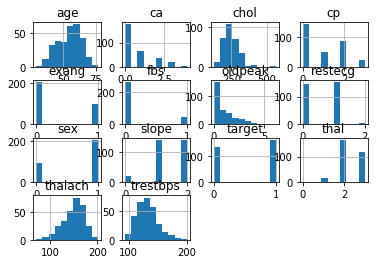

In [177]:
df = pd.read_csv('heart.csv')
df.hist() # Dataset Distribution

In [178]:
y = df['target'] # Features
X = df.drop(['target'], axis=1) # Label

In [179]:
# Scaling value
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Decision Tree - gini - Accuracy : 0.76
Decision Tree Confusion Matrix


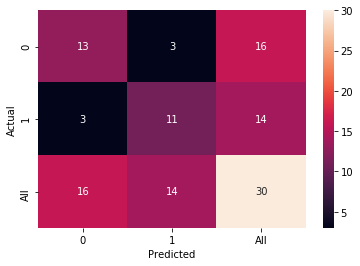

In [180]:
# Decision Tree #

criterion = ['gini', 'entropy'] # Hyperparameter for Decision Tress

max_scoreD = 0 # max accuracy score in decision tree for various parameter values
good_parm =0 # good parameter which has max accuracy

for i in criterion : # Tune hyperparameter(gini or entropy)
    decision = DecisionTreeClassifier(criterion=i) # create a new Decision Tree
    total_scoresD = [] # set for result(accuracy) of each fold
    kfold = KFold(n_splits = 10, shuffle=True) # create fold for k-fold cross validation
    
    for train, test in kfold.split(X) : # split data to train and test using fold
        decision.fit(X.iloc[train],y.iloc[train]) # training classifier
        predict_d = decision.predict(X.iloc[test]) # predict test data set
        score_d = np.mean(predict_d == y.iloc[test]) # get accuracy in this fold
        total_scoresD.append(score_d) 
        
    mean_score = round(np.mean(total_scoresD),2) # get mean of total socre for all folds
    
    # Find good classifier which has max accuracy and good parameter
    # And make confusion matrix with good result
    if(mean_score > max_scoreD) :
        max_scoreD = mean_score
        good_parm = i
        # Make Confusion matrix
        confusion_matrixD = pd.crosstab(y.iloc[test], predict_d,rownames=['Actual'], colnames = ['Predicted'], margins = True)
    
# Maximum score and the corresponding parameter values for Decision Tree
print("Decision Tree -",good_parm,"- Accuracy :", max_scoreD)

# Confusion Matrix Heatmap
print("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrixD, annot= True)

Logistic Regression - sag & 200 - Accuracy :  0.84
Logistic Regression Confusion Matrix


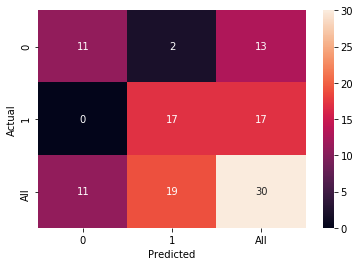

In [185]:
# Logistic Regression #

# Hyperparameter for Logistic Regression
solver = ['liblinear', 'lbfgs', 'sag']
max_iter = [50,100,200] 

max_scoreL = 0 # max accuracy score in decision tree for various parameter values

# good parameter which has max accuracy
good_parm1 =0
good_parm2 = 0

for i in solver : # Tune hyperparameter(solver, max_iter)
    for j in max_iter : 
        logistic =  LogisticRegression(solver = i, max_iter = j) # create a logistic regression
        total_scoresL = [] # set for result(accuracy) of each fold
        kfold = KFold(n_splits = 10, shuffle=True) # create fold for k-fold cross validation
        
        for train, test in kfold.split(X) : # split data to train and test using fold
            logistic.fit(X.iloc[train],y.iloc[train]) # training classifier
            predict_l = logistic.predict(X.iloc[test]) # predict test data set
            score_l = np.mean(predict_l == y.iloc[test]) # get accuracy in this fold
            total_scoresL.append(score_l)
        
        mean_scoreL = round(np.mean(total_scoresL),2) # get mean of total socre for all folds
            
    # Find good classifier which has max accuracy and good parameter
    # And make confusion matrix with good result
        if(mean_scoreL > max_scoreL) :
            max_scoreL = mean_scoreL
            good_parm1 = i
            good_parm2 = j
            # Make Confusion matrix
            confusion_matrixL = pd.crosstab(y.iloc[test], predict_l,rownames=['Actual'], colnames = ['Predicted'], margins = True)
        
# Maximum score and the corresponding parameter values for Logistic Regression
print("Logistic Regression -",i,"&",j,"- Accuracy : ", max_scoreL)

# Confusion Matrix Heatmap
print("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrixL, annot= True)

SVM - 0.1 & linear & 10 - Accuracy : 0.73
SVM Confusion Matrix


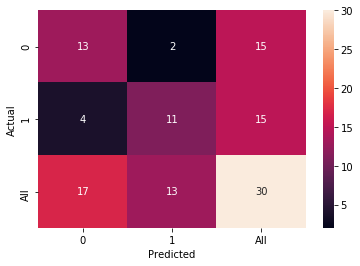

In [188]:
# SVM #

# Hyperparameter for SVM
C = [0.1, 1.0, 10.0]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [10,100]

max_scoreS = 0 # max accuracy score in decision tree for various parameter values

# good parameter which has max accuracy
good_parm1 =0
good_parm2 = 0
good_parm3 = 0

for i in C : # Tune hyperparameter(C, kernel, gamma)
    for j in kernel :
        for k in gamma :
            svm = SVC(C=0.1, kernel = 'linear', gamma = 10) # create SVM model
            total_scoresS = [] # set for result(accuracy) of each fold
            kfold = KFold(n_splits = 10, shuffle=True) # create fold for k-fold cross validation
            
            for train, test in kfold.split(X) : # split data to train and test using fold
                svm.fit(X.iloc[train],y.iloc[train]) # training classifier
                predict_s = logistic.predict(X.iloc[test]) # predict test data set
                score_s = np.mean(predict_s == y.iloc[test]) # get accuracy in this fold
                total_scoresS.append(score_s)
                
            mean_scoreS = round(np.mean(total_scoresS),2) # get mean of total socre for all folds
            
            # Find good classifier which has max accuracy and good parameter
            # And make confusion matrix with good result
            if(mean_scoreS > max_scoreS) :
                max_scoreS = mean_scoreS
                good_parm1 = i
                good_parm2 = j
                good_parm3 = k
                # Make Confusion matrix
                confusion_matrixS = pd.crosstab(y.iloc[test], predict_l,rownames=['Actual'], colnames = ['Predicted'], margins = True)

# Maximum score and the corresponding parameter values for SVM Model
print("SVM -",good_parm1,"&",good_parm2,"&",good_parm3,"- Accuracy :",max_scoreS)

# Confusion Matrix Heatmap
print("SVM Confusion Matrix")
sns.heatmap(confusion_matrixS, annot= True)

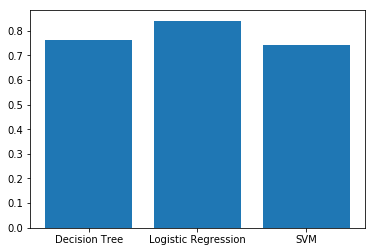

In [183]:
# 2D Bar chart with max accuracy in each classifier

maxAcc = []
maxAcc.append(max_scoreD)
maxAcc.append(max_scoreL)
maxAcc.append(max_scoreS)

classifier = ['Decision Tree', 'Logistic Regression', 'SVM']
plt.bar(classifier, maxAcc)
plt.show()